# Module 1

## Setup

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete
import os

## Win / Loss

In [2]:
win_prob = 20/100
loss_prob = 80/100
win_prob + loss_prob == 1

True

## Exam Scores

In [3]:
scores = {"50-60": 20, "61-80": 30, "81-100": 50}

In [4]:
tot = sum(scores.values())
probs = np.divide(list(scores.values()),tot)
print(probs)

[0.2 0.3 0.5]


In [5]:
sum(probs) == 1

True

## Coin Toss

In [6]:
np.random.choice(["heads", "tails"])

'heads'

## Roll Dice

In [7]:
np.random.randint(1,6)

1

In [8]:
def roll_dice(n):
    return np.random.randint(1, 7, n)

In [9]:
rolls = [roll_dice(n) for n in [100, 10000, 1000000]]

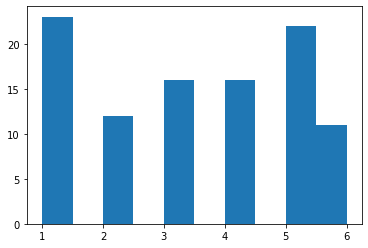

In [10]:
plt.hist(rolls[0]);

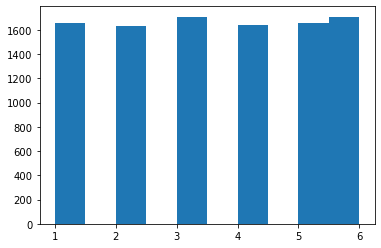

In [11]:
plt.hist(rolls[1]);

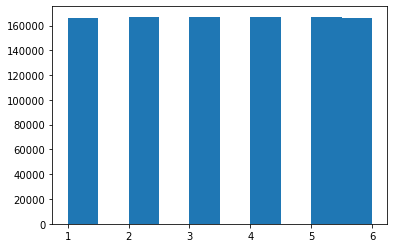

In [12]:
plt.hist(rolls[2]);

In [13]:
p = 1/6
di_probs = {i:p for i in range(1,7)}

In [14]:
sum(di_probs.values())

0.9999999999999999

## Digital Channel (Ex 3.5)

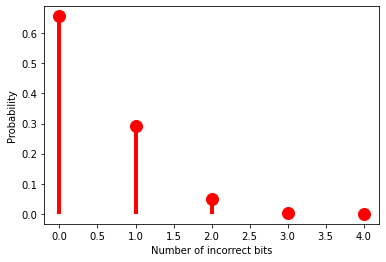

In [15]:
# modified from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html
xk = np.arange(5)
pk = [0.6561, 0.2916, 0.0486, 0.0036, 0.0001]
custm = rv_discrete(name='custm', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.xlabel("Number of incorrect bits")
plt.ylabel("Probability")
plt.show()

### Cumulative Sum

In [16]:
print(np.cumsum(pk))

[0.6561 0.9477 0.9963 0.9999 1.    ]


### Expectation Value

In [17]:
mu = np.dot(xk, pk)
print(mu)

0.4


### Variance

In [18]:
var = sum([p*(x-mu)**2 for x, p in zip(xk, pk)])
print(var)

0.3600000000000001


Note that np.var() calculates the population variance with equal weights (assuming default arguments for np.var()). Notice that the result is incorrect.

In [19]:
np.var(pk)

0.06357454

#### Helper Function for Mean and Variance

In [20]:
def dist_mean_var(xk, pk):
    mu = np.dot(xk, pk)
    var = sum([p*(x-mu)**2 for x, p in zip(xk, pk)])
    return mu, var

### Standard Deviation

In [21]:
np.sqrt(var)

0.6000000000000001

In [22]:
mu, var = dist_mean_var(xk, pk)
print(mu, var)

0.4 0.3600000000000001


## NiCd Battery (3.3.6)

In [23]:
battery = {0: 0.17, 2: 0.35, 3: 0.33, 4: 0.15}
charges = list(battery.keys())
vals = list(battery.values())
cdf = np.cumsum(vals)
print(cdf)

[0.17 0.52 0.85 1.  ]


In [24]:
n = 10000
x = np.linspace(0, 5, num=n)
c1 = (x >= 0) & (x < 2)
c2 = (x >= 2) & (x < 3)
c3 = (x >= 3) & (x < 4)
c4 = x >= 4
conds = [c1, c2, c3, c4]
pw = np.piecewise(x, conds, cdf)

Text(0, 0.5, 'CDF')

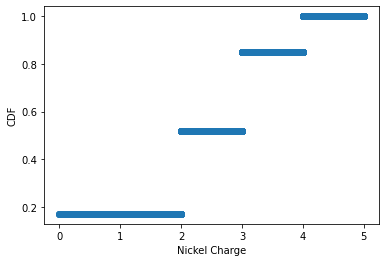

In [25]:
plt.scatter(x,pw)
plt.xlabel("Nickel Charge")
plt.ylabel("CDF")

In [26]:
mu, var = dist_mean_var(charges, vals)
sigma = np.sqrt(var)
print(mu, sigma)

2.29 1.235273249123448


# Code Graveyard

In [27]:
n = 10000
x = np.linspace(0, 100, num=n)
c1 = (x >= 50) & (x <= 60)
c2 = (x >= 61) & (x <= 80)
c3 = (x >= 81) & (x <= 100)
conds = [c1, c2, c3]
vals = np.array([20/(60-50), 30/(80-61), 50/(100-81)])/n

In [28]:
pw = np.piecewise(x, conds, vals)
print(pw)

[0.         0.         0.         ... 0.00026316 0.00026316 0.00026316]


In [29]:
sum(pw)

0.9999999999999853

In [30]:
[sum(c*pw) for c in conds]

[0.20000000000000367, 0.2999999999999941, 0.5000000000000163]

In [31]:
conds = [0, 1, 2, 3, 4]
vals = [0.6561, 0.2916, 0.0486, 0.0036, 0.0001]
digi_chan = {cond: val for cond, val in zip(conds,vals)}
print(digi_chan)

{0: 0.6561, 1: 0.2916, 2: 0.0486, 3: 0.0036, 4: 0.0001}


# Print to PDF

In [32]:
os.system("jupyter nbconvert --to pdf module-1.ipynb")

0